In [8]:
from transformers import GPT2LMHeadModel

In [9]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2-medium")
sd_hf = model_hf.state_dict()

for k, v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 1024])
transformer.wpe.weight torch.Size([1024, 1024])
transformer.h.0.ln_1.weight torch.Size([1024])
transformer.h.0.ln_1.bias torch.Size([1024])
transformer.h.0.attn.c_attn.weight torch.Size([1024, 3072])
transformer.h.0.attn.c_attn.bias torch.Size([3072])
transformer.h.0.attn.c_proj.weight torch.Size([1024, 1024])
transformer.h.0.attn.c_proj.bias torch.Size([1024])
transformer.h.0.ln_2.weight torch.Size([1024])
transformer.h.0.ln_2.bias torch.Size([1024])
transformer.h.0.mlp.c_fc.weight torch.Size([1024, 4096])
transformer.h.0.mlp.c_fc.bias torch.Size([4096])
transformer.h.0.mlp.c_proj.weight torch.Size([4096, 1024])
transformer.h.0.mlp.c_proj.bias torch.Size([1024])
transformer.h.1.ln_1.weight torch.Size([1024])
transformer.h.1.ln_1.bias torch.Size([1024])
transformer.h.1.attn.c_attn.weight torch.Size([1024, 3072])
transformer.h.1.attn.c_attn.bias torch.Size([3072])
transformer.h.1.attn.c_proj.weight torch.Size([1024, 1024])
transformer.h.1

In [10]:
sd_hf["transformer.wpe.weight"].view(-1)[:20]

tensor([-3.7186e-02, -3.3882e-03, -2.2368e-02, -7.4338e-02, -7.6074e-02,
         1.5083e-02,  1.6336e-02, -2.9988e-02, -7.9649e-02, -1.7628e-02,
         5.3884e-03,  3.6602e-04,  1.1027e-02, -3.2611e-02, -1.3938e-02,
         7.1263e-04, -2.5236e+00, -5.5869e-03,  4.6805e-02, -5.3445e-02])

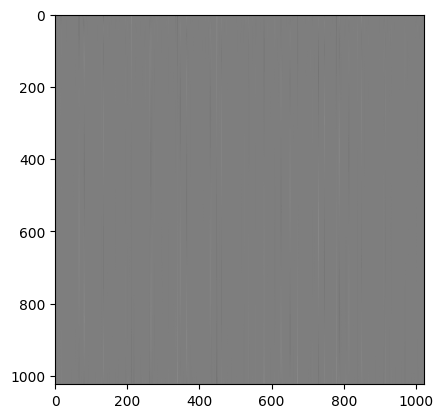

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(sd_hf["transformer.wpe.weight"], cmap='gray')

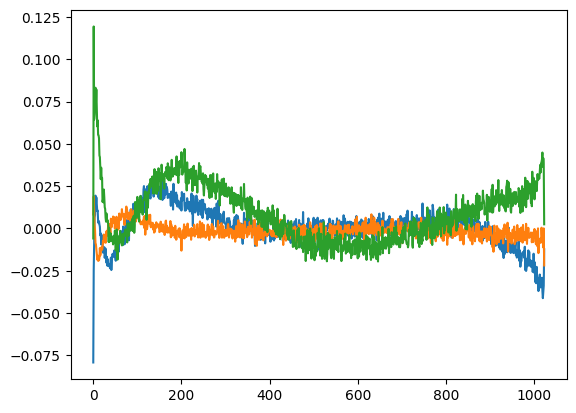

In [12]:
plt.plot(sd_hf["transformer.wpe.weight"][:,150])
plt.plot(sd_hf["transformer.wpe.weight"][:,200])
plt.plot(sd_hf["transformer.wpe.weight"][:,250]);

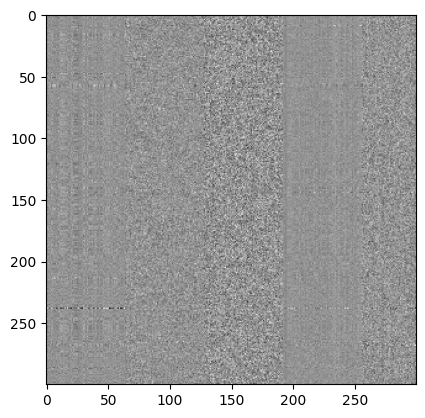

In [13]:
plt.imshow(sd_hf["transformer.h.1.attn.c_attn.weight"][:300, :300], cmap='gray')

In [15]:
from transformers import pipeline, set_seed
generator = pipeline("text-generation", model="gpt2-medium")
set_seed(42)
generator("Hello, I'm a language model,",
           max_length=30, num_return_sequences=5)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model, but what I'm really doing is making a language model for people. There are people who can learn an expressive"},
 {'generated_text': "Hello, I'm a language model, this is my first blogpost.\n\nLanguage models are very fundamental to software development and are essential to maintaining"},
 {'generated_text': "Hello, I'm a language model, and I'll do anything in my power to help improve the language as it's being designed. I have over"},
 {'generated_text': 'Hello, I\'m a language model, not a developer."\n\nI\'m not.\n\nI\'ve spent more than five years doing what I'},
 {'generated_text': "Hello, I'm a language model, I've been using them in all sorts of scenarios for a while and I still have issues – it's pretty"}]